In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mrconso = pd.read_csv('/Users/qinyilong/Desktop/ScAi/MRCONSO.RRF', sep='|', header=None, dtype=object)

In [3]:
mrconso = mrconso.drop(18, axis=1) # last column is meaningless because the entry ends with '|'
mrconso.columns = ["CUI", "LAT", "TS", "LUI", "STT", "SUI", "ISPREF", "AUI", "SAUI", "SCUI", "SDUI", "SAB", "TTY", "CODE", "STR", "SRL", "SUPPRESS", "CVF"]

In [7]:
sources = mrconso.SAB.drop_duplicates().tolist()

In [12]:
sab_cuis = []
for sab in sources:
    cuis = mrconso[mrconso.SAB == sab].CUI.tolist()
    sab_cuis.append(cuis)

In [18]:
sum = 0
for sab in sab_cuis:
    print(len(sab))
    sum += len(sab)
assert(sum == mrconso.shape[0])

871940
121020
76433
317948
260835
142240
164097
479293
1433455
24764
87456
59025
124047
50108
80965
123446
1148396
75488
29014
44252
22767
7957
146152
347217
13328
9981
61002
20679
3095
178920
6651
337464
22517
82143
1964
1703
3546
901296
111456
6816
6955
26447
165649
62309
908
23180
3379
868
40537
1405
718
1159
6442
92901
170997
5019
183439
104092
11359
76614
104092
81774
13500
25881
105336
22167
179050
3829
15834
104092
3715
11999
104092
104093
104094
198936
10997
3748
104094
104094
3458
12157
23510
16889
3758
10112
3400
3104
695
723
723
685
30773
91665
771
1379
7372
1053
943
722
723
723
718
723
722
723
723
723
17294
2041
1617
880
40813
1251
44476
12159
1957844
485
208
2229
7843
12002
38722
258
4879
684
410
2405
1107
1945
1833
1799
462
3012
3339
1337
13492
9065
1185
1521
1771
835
1150
554
70890
3260
959
923
21147
61636
2684
53
798
527
261
1410
770
13178
623
349906
544
114
72632
43
277
3000
137
173731
336
110887
76586
8
471
84
4737
162
244
156
256
1181
39
380
77
77622
52516
31204
4534

In [21]:
sab_cui_sets = []
for sab in sab_cuis:
    sab_cui_sets.append(set(sab))

In [22]:
for sab in sab_cui_sets:
    print(len(sab))

376646
46268
41468
205426
259572
39674
112617
176936
387100
24755
42608
39394
24873
28937
38850
28934
366492
38413
29014
35210
16634
6734
56304
186088
13272
9092
32600
15901
3075
70302
6586
142552
20618
66245
1322
1696
3537
342550
42950
5411
5484
10705
58038
33973
904
8233
2112
411
20630
1112
651
407
3859
61121
102420
4910
104074
55118
10694
35451
55118
38021
11549
24087
55118
9107
102400
3176
15245
55118
3100
11328
55118
55119
55119
50035
10348
3120
55119
55119
3083
8550
19108
7179
3688
7322
2795
2567
694
722
722
685
15168
36458
768
693
4760
748
941
721
722
722
717
722
721
722
722
722
11135
1908
1109
623
20973
937
19227
3117
1409495
472
206
2172
3286
9640
24802
209
4808
629
405
2254
1005
1634
1634
1634
372
2878
3261
881
13311
4613
820
1435
1666
280
1148
511
40345
753
956
920
17412
31326
2684
27
794
519
260
702
761
6460
419
190389
539
114
55533
41
244
1322
76
41304
334
58420
38199
8
276
84
4736
162
129
156
170
420
39
380
76
77507
52424
31147
45285
45838
4940
48446
4941
4939
66296
57399

#### Observation: duplicated CUIs in sources

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
G = nx.Graph()

In [33]:
for i in range(len(sab_cui_sets)):
    for j in range(i+1, len(sab_cui_sets)):
        inter_size = len(sab_cui_sets[i].intersection(sab_cui_sets[j]))
        if inter_size != 0:
            G.add_edge(sources[i], sources[j], weight=inter_size)

In [35]:
position = nx.nx_agraph.graphviz_layout(G, prog='neato')

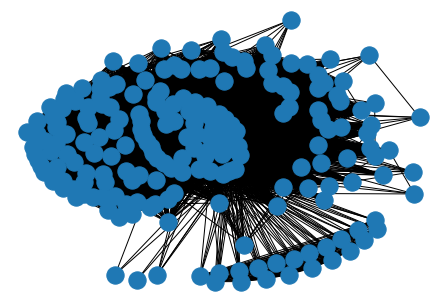

In [39]:
nx.draw(G, position)
plt.show()